## Student performance indicatior

### Life cycle of ml proj
- Understanding the prob stmt
- Data collection
- Data checks to perform
- Exploratorty DA
- Data pre-processing
- Model training
- Choose best model

### 1. Prob stmt
- Student's performance

### 2. Data collection
- Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data
- 8 cols and 1000 rows

### 2.1 Import data and req packages
#### Importing numpy pandas matplotlib seaborn warings library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import CVS data as Pandas data frame

In [2]:
df = pd.read_csv('stud.csv')

#### Show top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 2.2 Dataset info
- gender: sex of students -> (Male/female)
- reace/ethnicity: ethnicity of students -> Group A,B,C,D,E to prevent reacism didn't mention actual values
- parental level to education
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not completet before test
- math score
- reading score
- writing score

### 3. Data checks to perform 
- Check missing values
- Check Duplicates
- Check data type
- Check the no of unique values of each column
- Check stats of data set
- Check various categories present in the different categorical column

### 3.1 Check missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Observation : no missing values :)

### 3.2 check duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

#### Observation : no duplicated value :)

### 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique() # basiaclly essential for categorical columns

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.08
- All st. dev. are also close - b/w 14.6 and 15.19
- While there is a min score 0 for math, for writing min is much higher = 1- and for reading is 17 

### 3.7 Explore Data

In [10]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental lvl of edu' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental lvl of edu' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [11]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [12]:
numeric_features

['math_score', 'reading_score', 'writing_score']

### 3.8 Adding cols for total score and average

In [13]:
df['total_score'] = 0
for score in ['math_score', 'reading_score', 'writing_score']:
    df['total_score'] += df[score]
df['average_score'] = df['total_score']/3

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
for score in ['math_score', 'reading_score', 'writing_score']:
    print(f"No of students with full in {score} is {df[df[score] == 100]['average_score'].count()}")

No of students with full in math_score is 7
No of students with full in reading_score is 17
No of students with full in writing_score is 14


In [16]:
for score in ['math_score', 'reading_score', 'writing_score']:
    print(f"No of students with < 20 marks in {score} is {df[df[score] < 20]['average_score'].count()}")

No of students with < 20 marks in math_score is 4
No of students with < 20 marks in reading_score is 1
No of students with < 20 marks in writing_score is 3


#### Insights
- From above we get students have performed worst in maths.
- Best performance is in reading section

## 4.Exploring Data (Visualization)

### 4.1 Visualize avg score dist to make some conclusion
- Histogram
- Kernek Distribution Function (KDE)

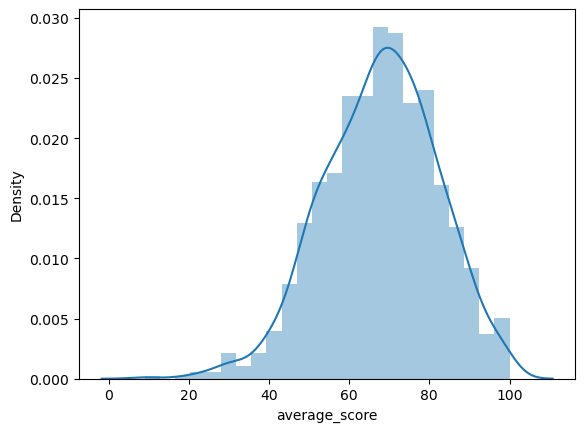

In [17]:
# self
sns.distplot(df['average_score'])
plt.show()

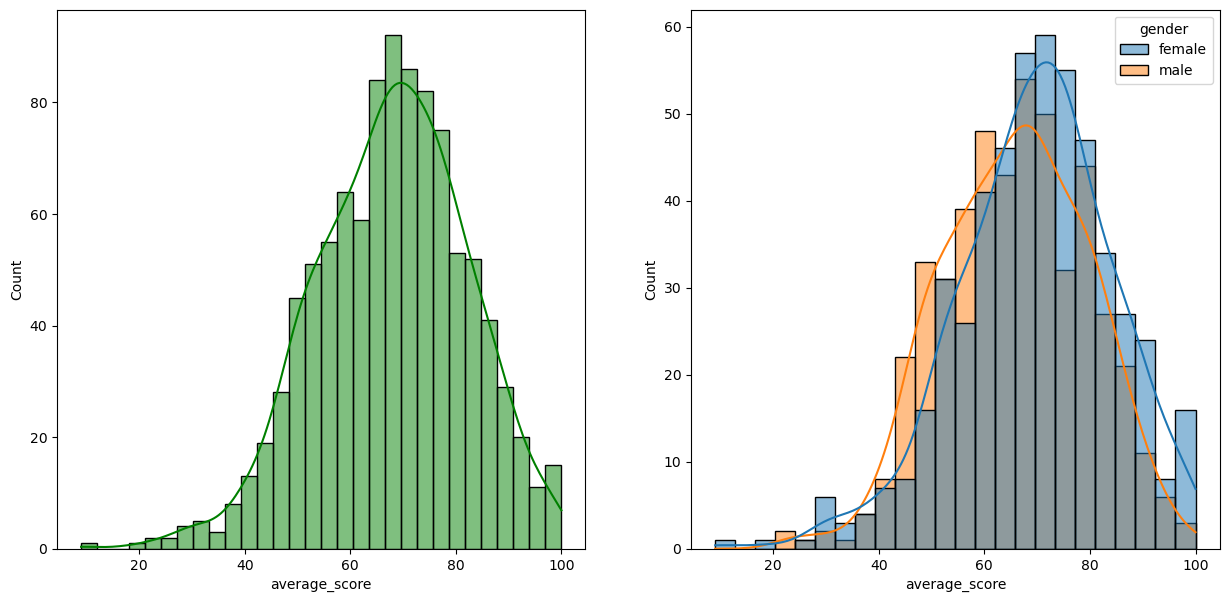

In [18]:
fig, axis = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score', kde=True, hue='gender')
plt.show()

### Insights
- Female students tend perform well than male students.

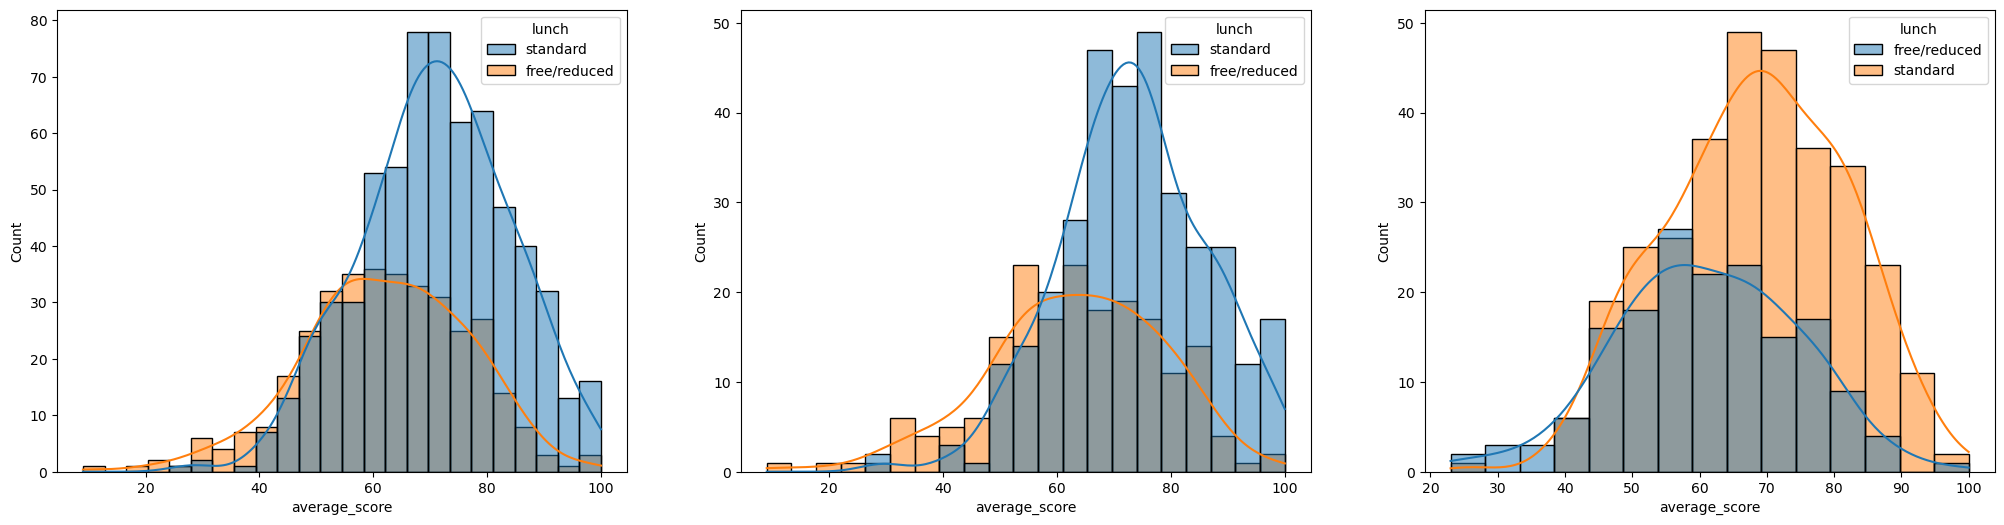

In [19]:
fig, axis = plt.subplots(1, 3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='lunch')
plt.show()

### Insights
- Standard lunch helps perform well in exams
- Standard lunch helps perform well in exams be it a male or female

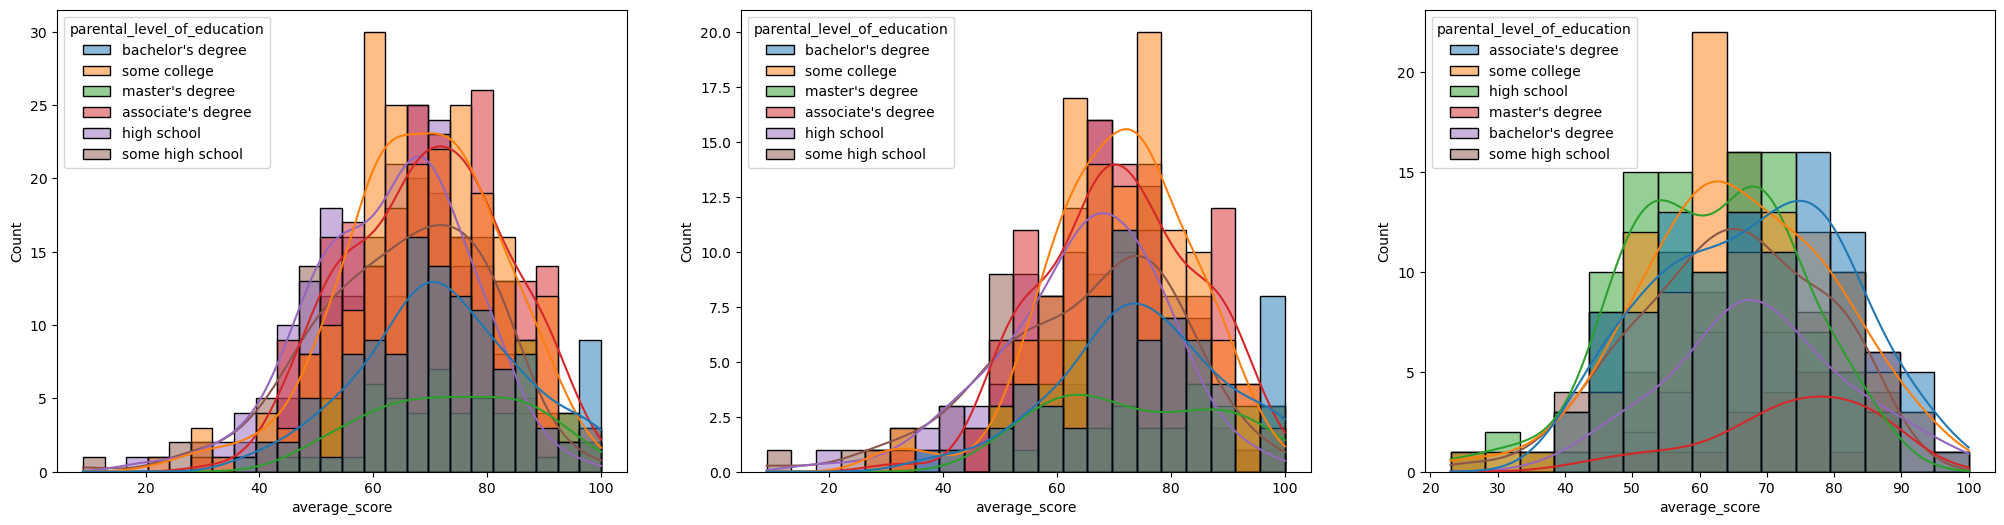

In [20]:
fig, axis = plt.subplots(1, 3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='parental_level_of_education')
plt.show()

### Insights
- In general parents education dont help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
- 3 rd plot we can see there is no effect of parents education on female students.

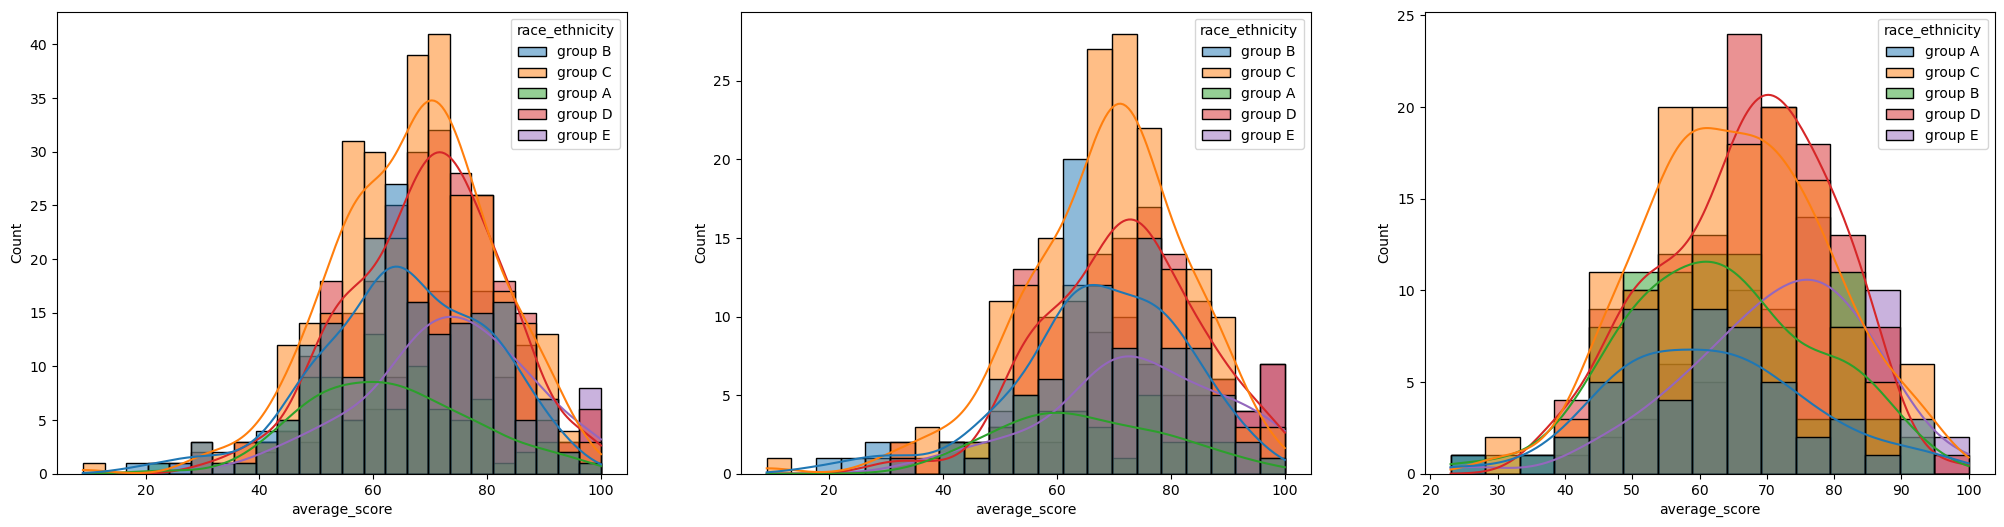

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

### Insights
- Students of grp A and grp B tends to perform poorly in exam.
- Irrespective of male or female

### 4.2 Maximum score of students in all three subjects

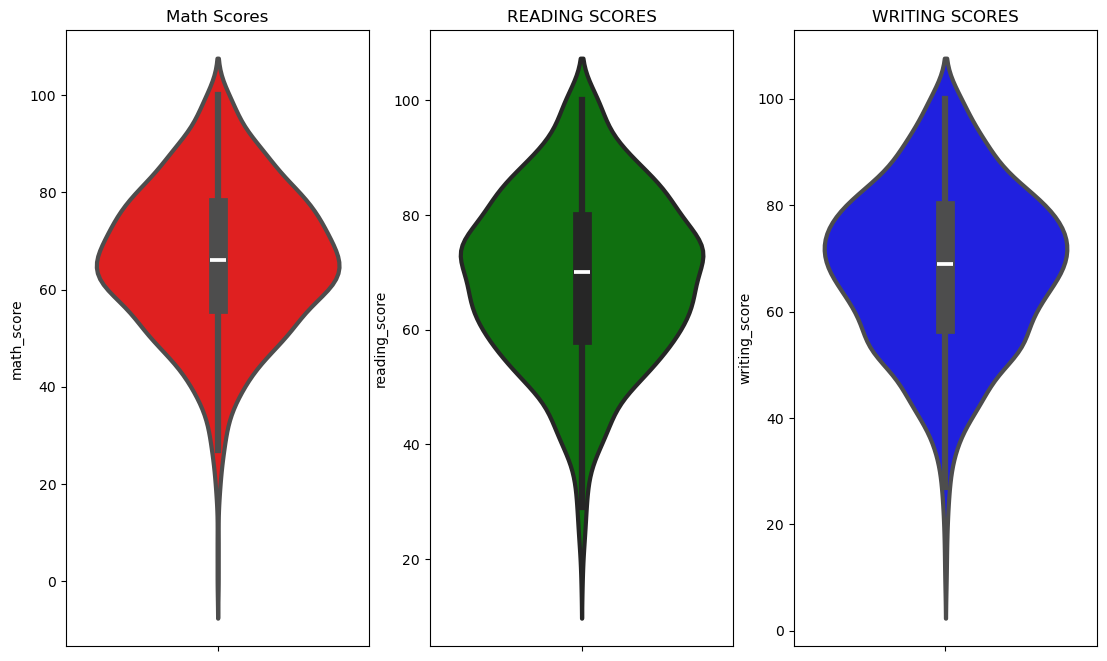

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math_score', data=df, color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Insights 
- From above 3 plots its clearly visible that most of students score in b/w 60-80 in maths and whereas in reading and writing most of them score from 50 - 80

### 4.3 Multivariate analysis using pieplot

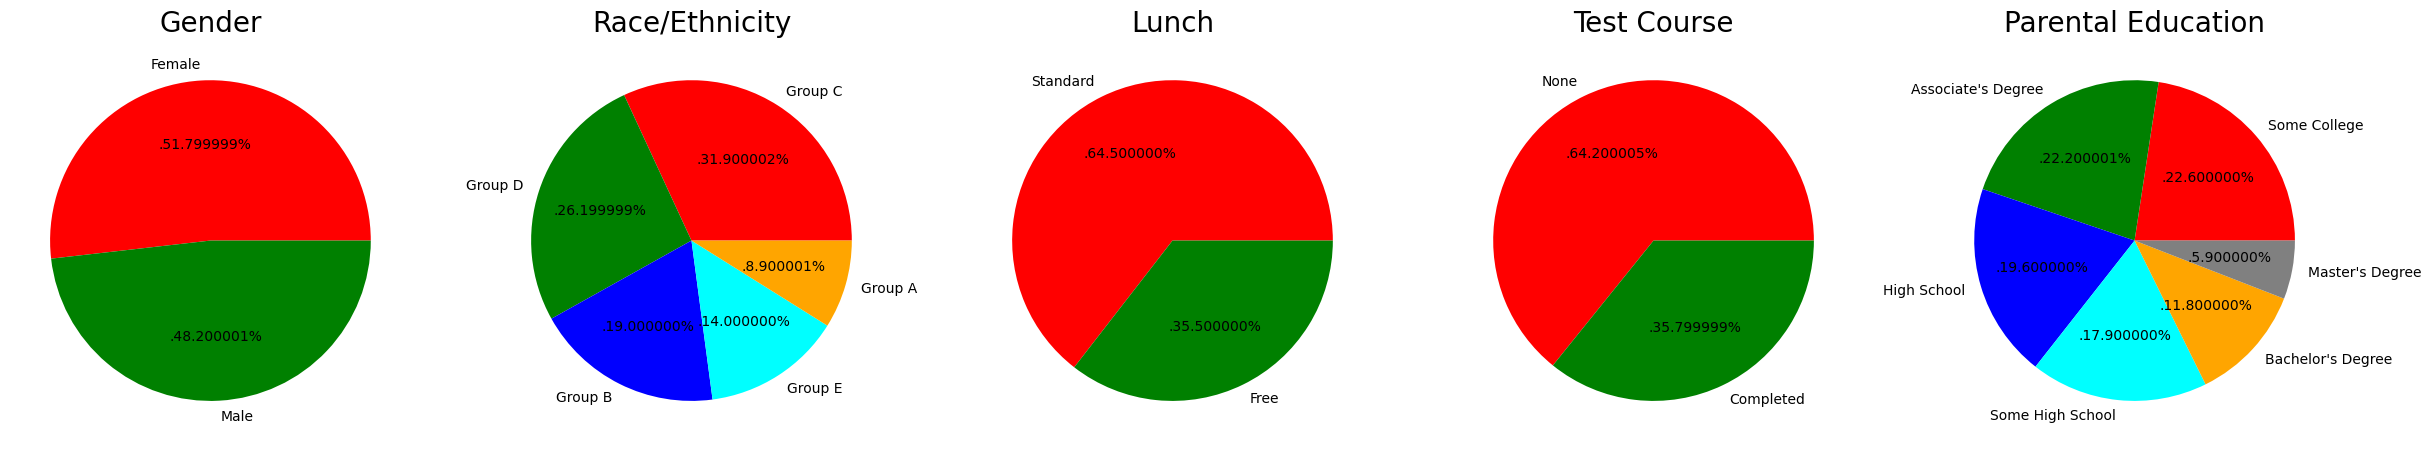

In [23]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels =   'Female', 'Male'
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size, colors=color, labels=labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

# plt.tight_layout()
# plt.grid()


plt.show()

### Insights
- Number of Male and Female students is almost equal
- Number of students are greatest in group C
- No of stu who have standard lunch are greater
- No of stu who have not enrolled in any test prepration course is greatest
- No of stu whose parental education is 'Some College' is greater followd closely by 'Associate's Degree'

### 4.4 Feature Wise Visualization
### 4.4.1 Gender column
- Dist of gender ?
- Is gender has any impact on student's performance ?

### Univariate Analysis (How is dist of Gender ?)

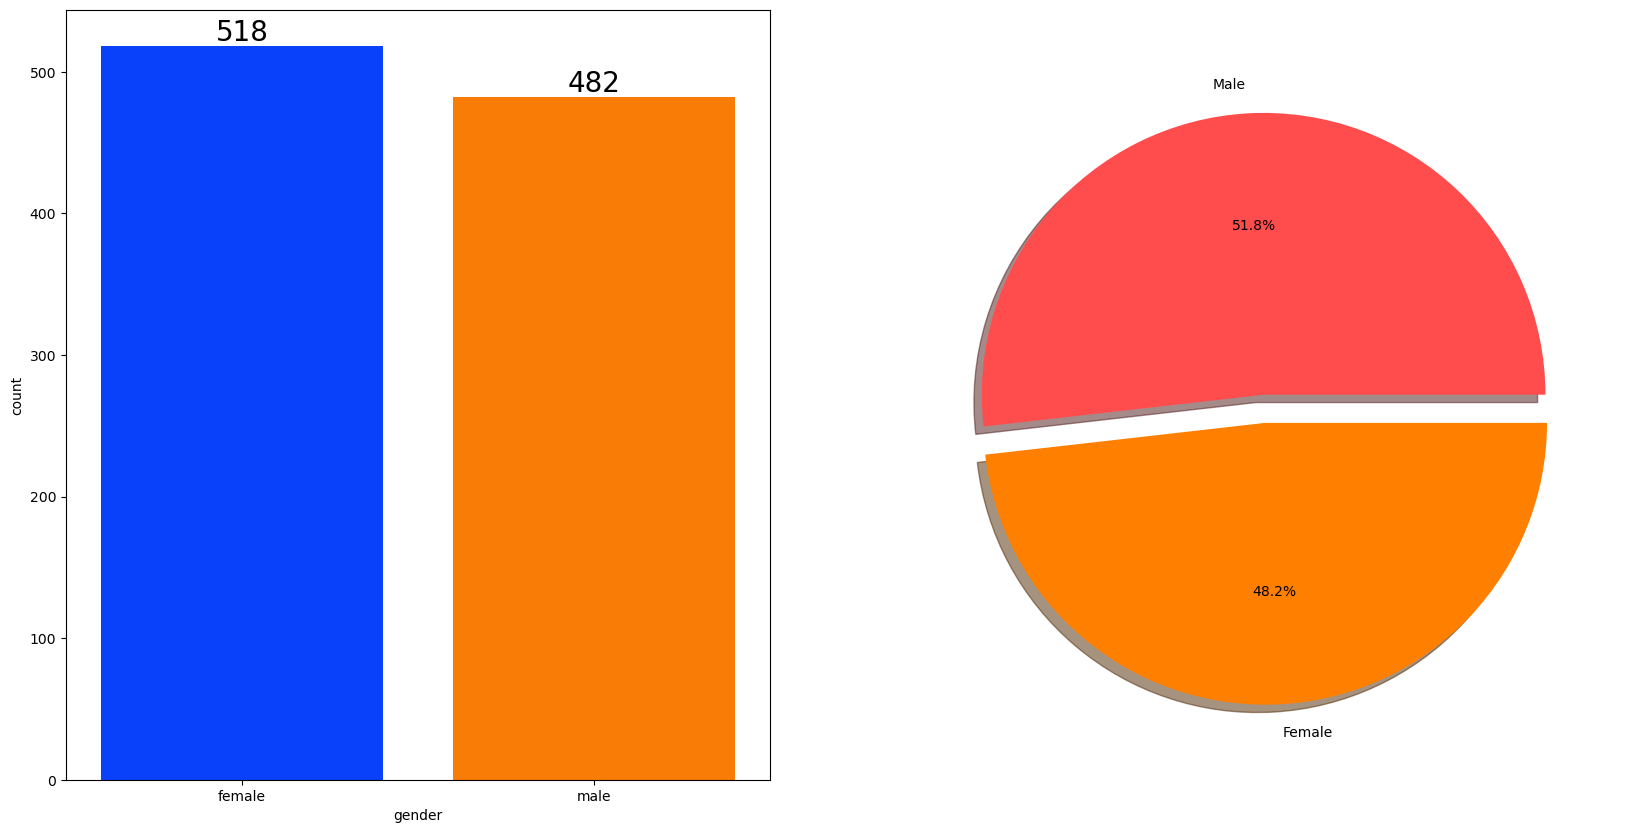

In [24]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### Bivariate Analysis (Is gender has any impact on student's performance ?)

In [26]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


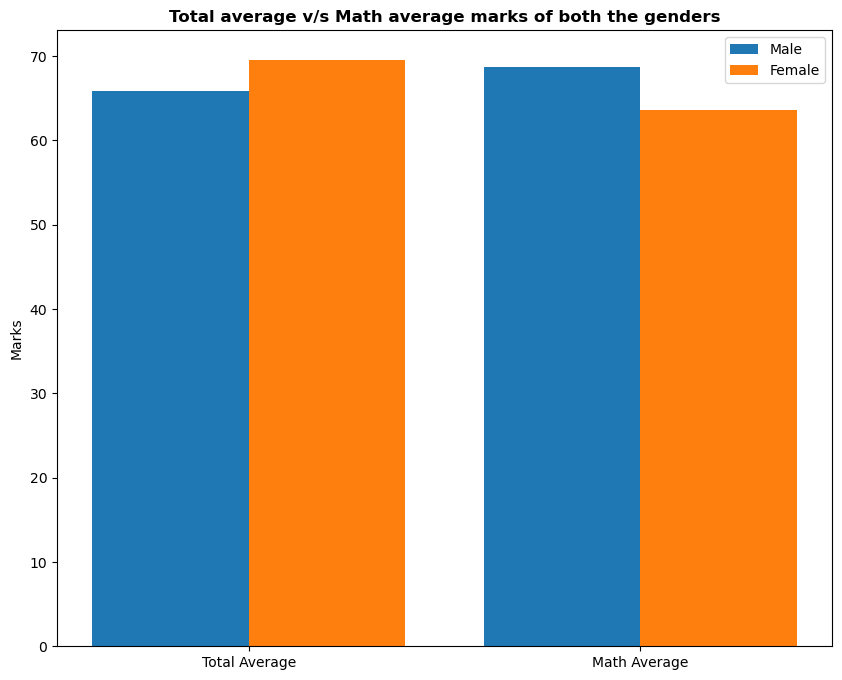

In [27]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title('Total average v/s Math average marks of both the genders', fontweight='bold')
plt.legend()
plt.show()

### Insights 
- On an average females have a better overall score than men.
- Whereas males have scored hihger in maths.

### 4.4.2 Race/Ethnicity Column
- How is group wise distributions
- Is race/ethnicity has any impact on students performance

### Univariate Analysis (How is Group wise distribution ?)

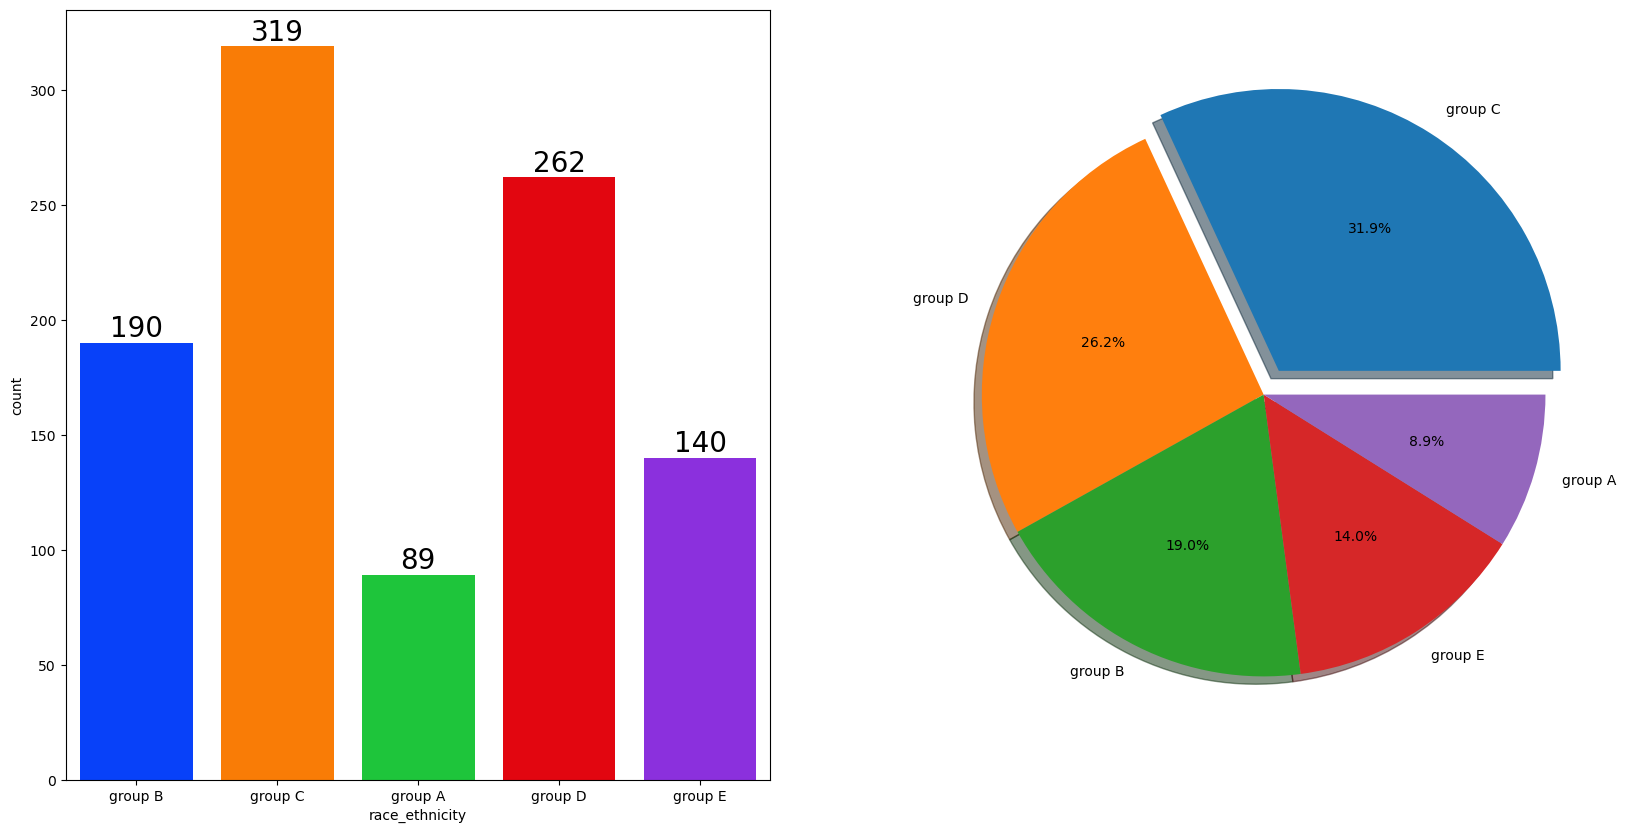

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True)
plt.show()

### Insights
- Most of the students belonging from group C / group D.
- Lowest number of students belong to groupA.

### Bivariate Analysis (Is race/ethnicity has any impact on students performance?)

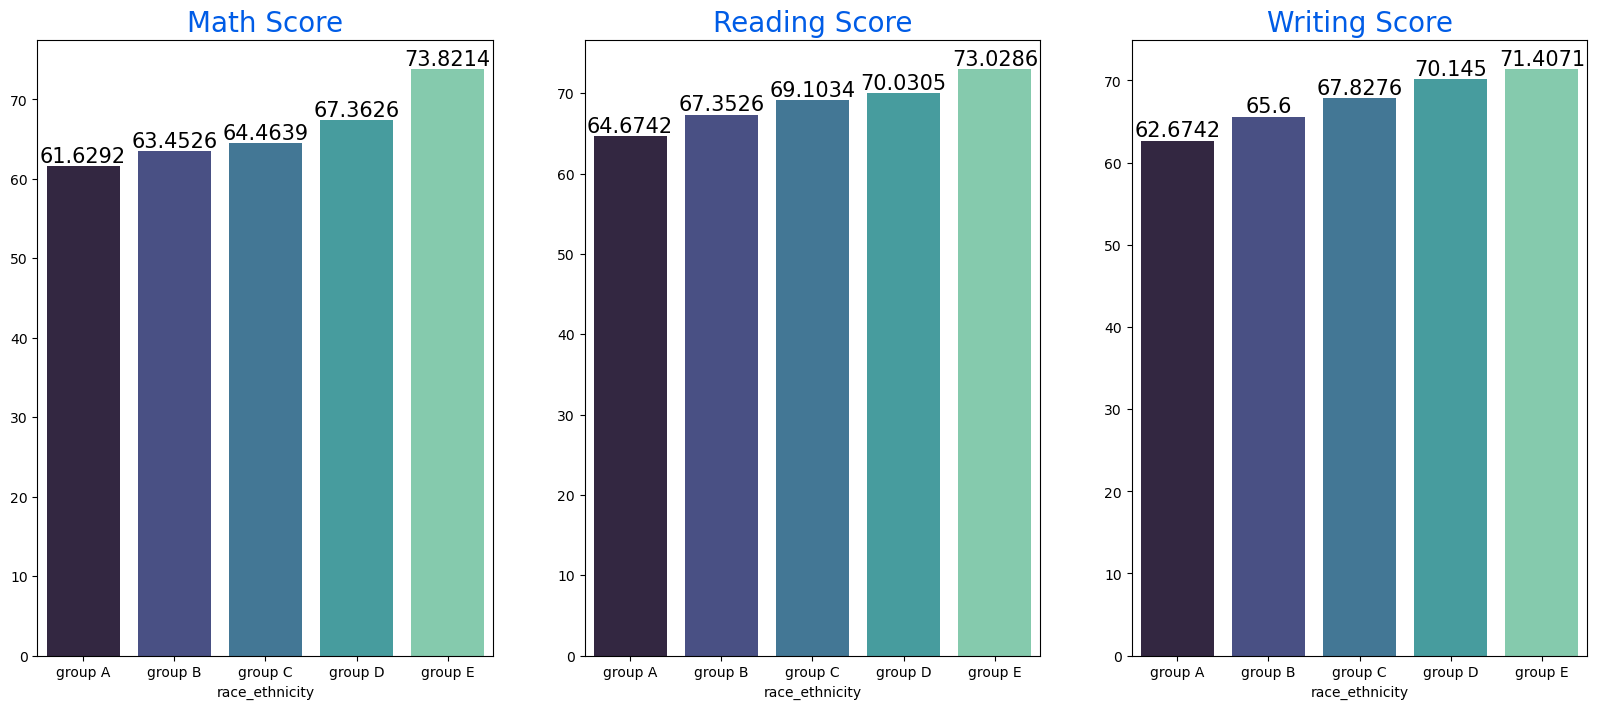

In [43]:
group_data2 = df.groupby('race_ethnicity')
f,ax = plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=group_data2['math_score'].mean().index,y=group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,palette = 'mako',ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,palette = 'mako',ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

plt.show()

### Insights
- Group E students have scored the highest marks.
- Group A students hace scored the lowest marks.
- Students from a lower Scioe-economic status have a lower avg in all course subjects

### 4.4.3 Parental level of education column
- What is education background of student's parent ?
- Is parental education has any impact on student's performance ?

### Univariate Analysis 

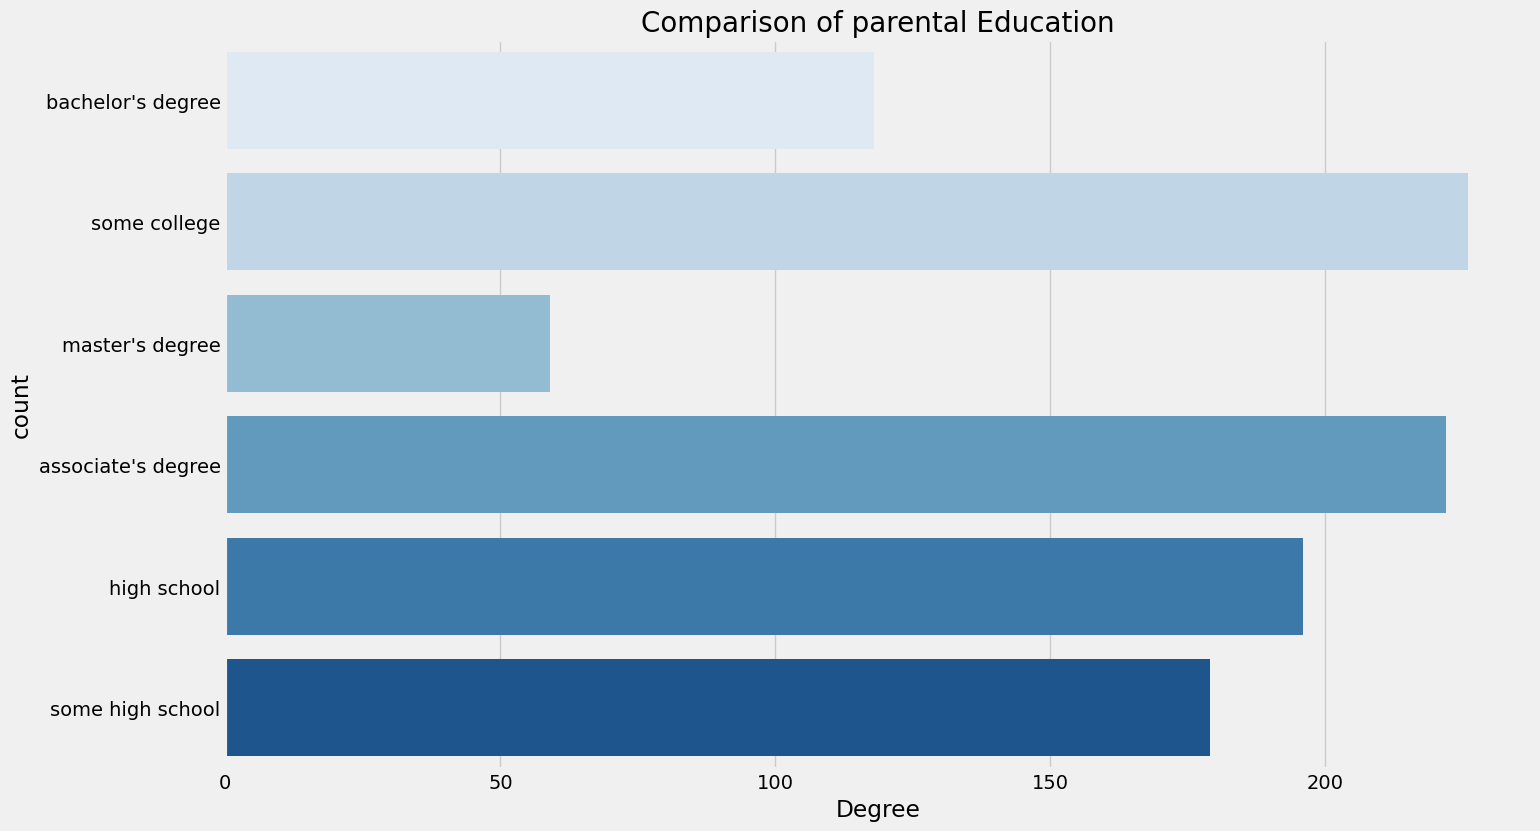

In [44]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Insights
- Largest number of parents are from some college

### Bivariate Analysis

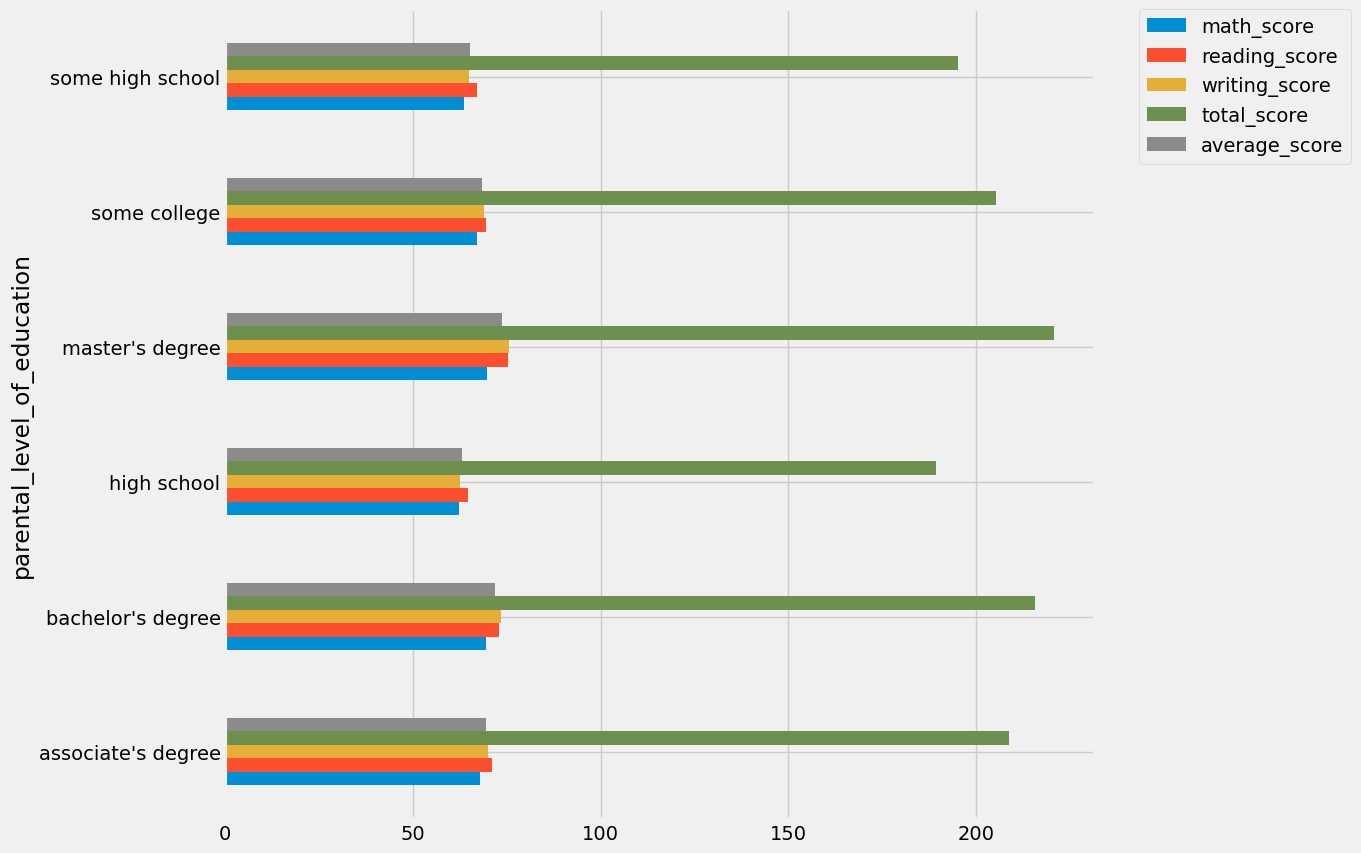

In [46]:
df.groupby('parental_level_of_education').agg('mean', numeric_only=True).plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

### Insights
- The score of students whose parent possess master and bachelor level education are higher than others.

### 4.4.4 Lunch column
- Which type of lunch is most common among students ?
- What is the effect of lunch type on results ?

### Univariate Analysis (Which type of lunch is most common among students ?)

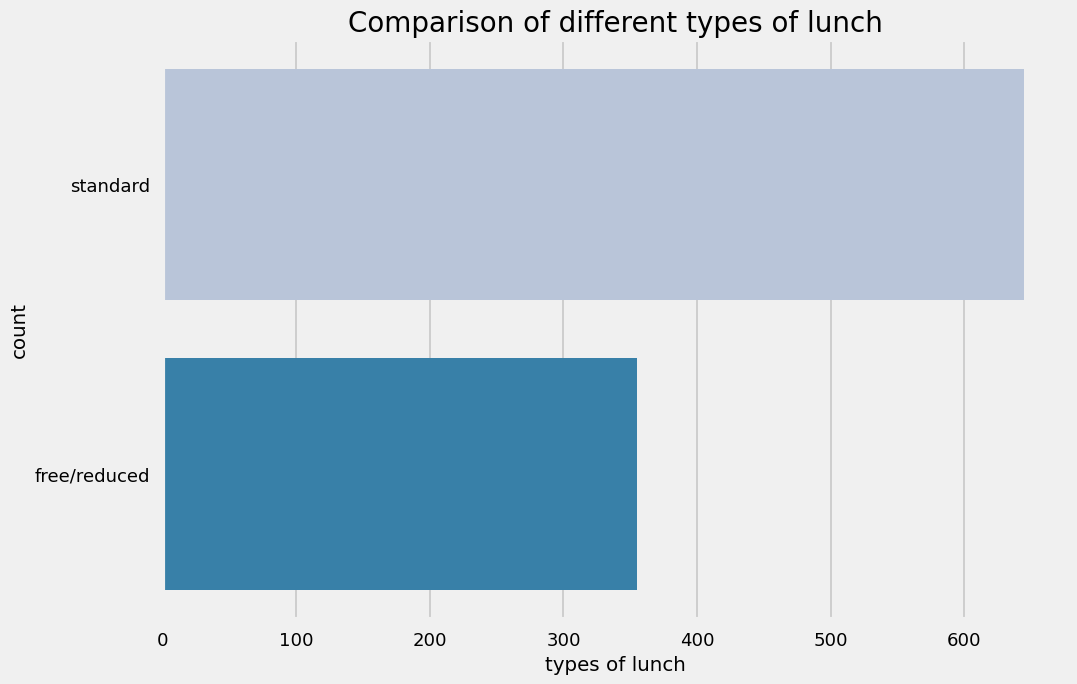

In [48]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

### Insights
- Students being served standard lunch was more than free lunch

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

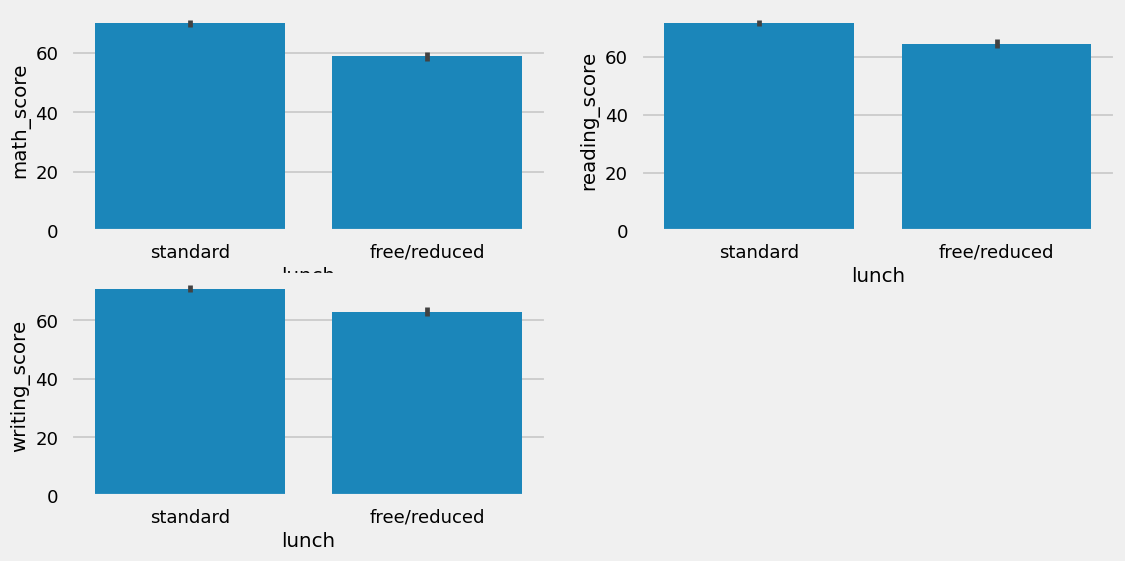

In [59]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'])

plt.show()

### Insights 
- Students who get standard perform better

### 4.4.5 Test Preparation course column
- Whicg type of lunch is most common among students ?
- Is test preparation course has any impact on students performance ?

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

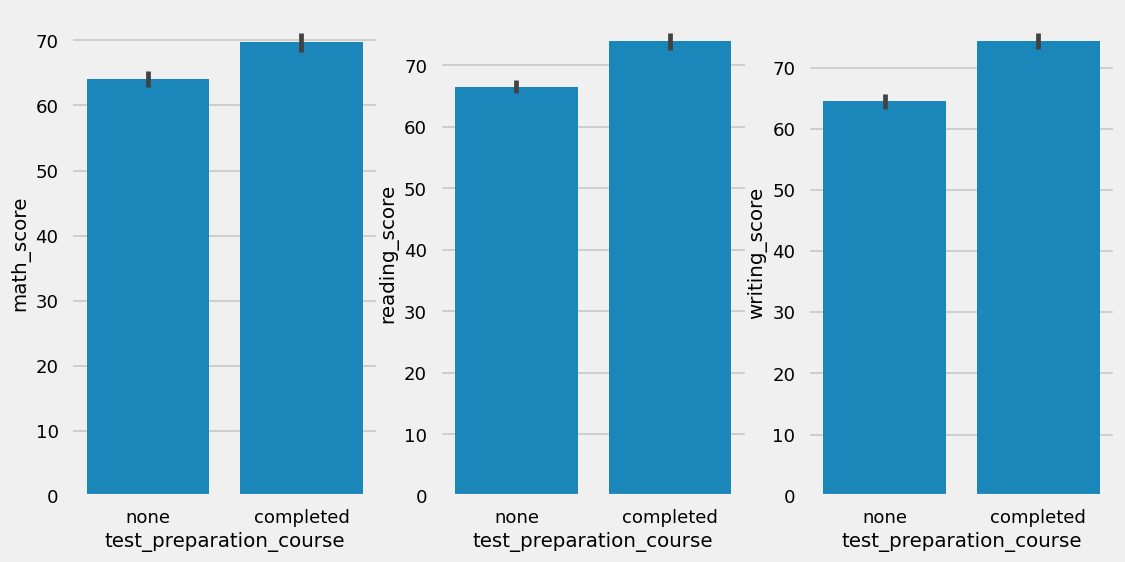

In [69]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot (x=df['test_preparation_course'], y=df['math_score'])
plt.subplot(1,3,2)
sns.barplot (x=df['test_preparation_course'], y=df['reading_score'])
plt.subplot(1,3,3)
sns.barplot (x=df['test_preparation_course'], y=df['writing_score'])

plt.show()

### Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### 4.4.6 Checking Outliers

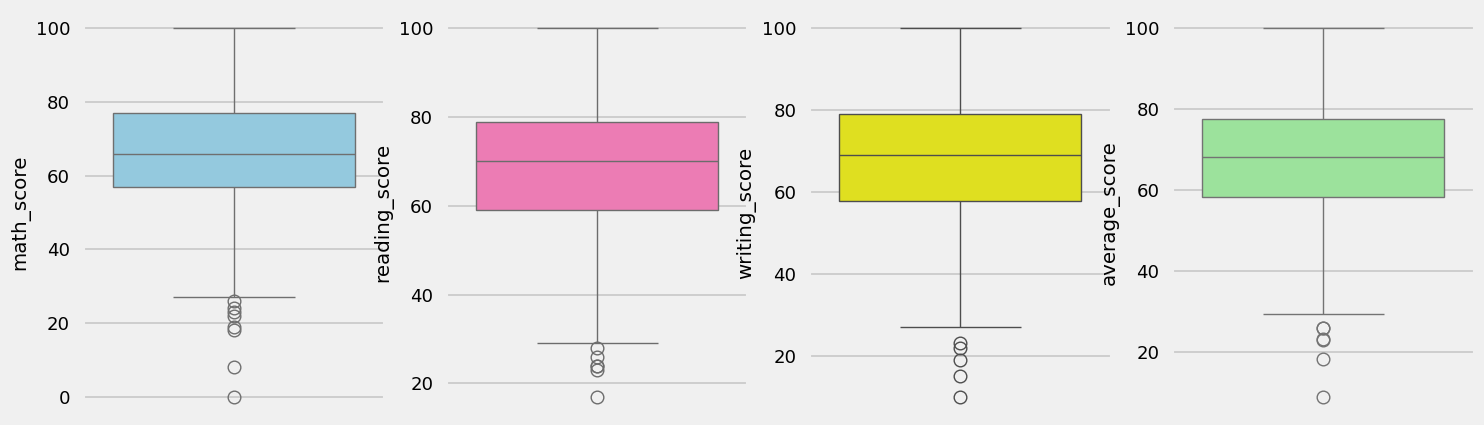

In [72]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

### 4.4.7 Multivariate Analysis using oairplot

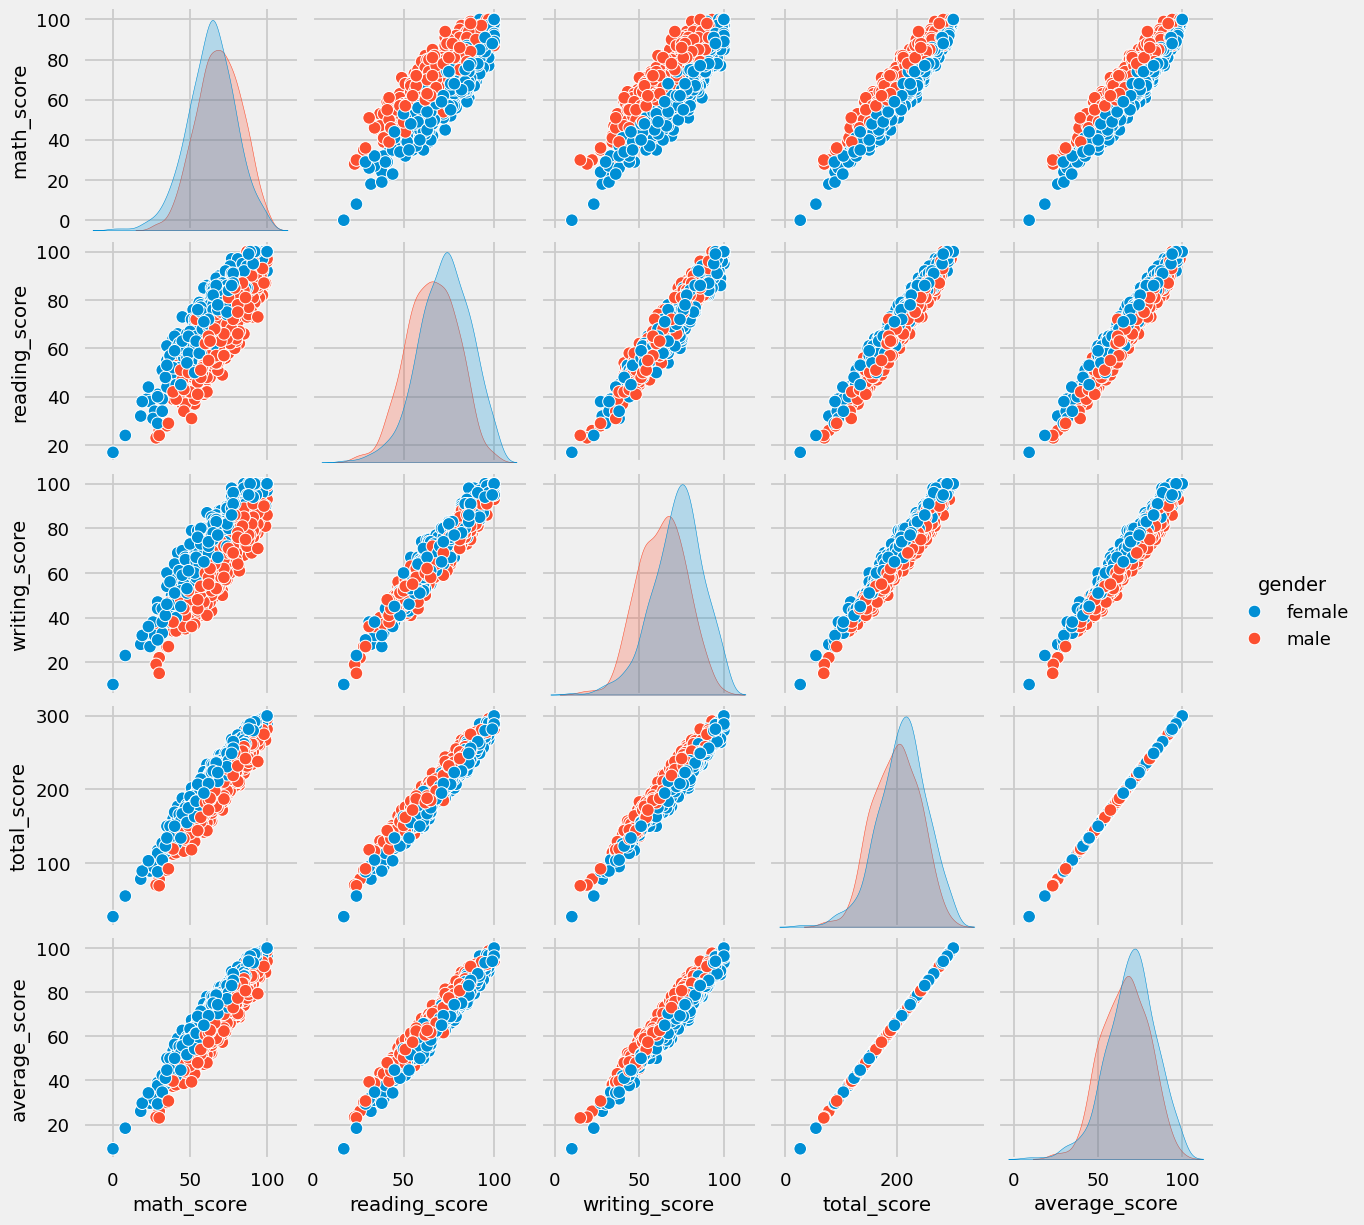

In [73]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Students performance is related with lunch, race, parental level education.
- Females lead in pass percentage and also are top-scores
- Students performance is not much related with test preparation course
- Finishing preparation course is benefitial